In [1]:
from flopy4.data.mfarray import MFArray
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

C:\Users\jlarsen\Documents\anaconda3\lib\site-packages\matplotlib\__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
C:\Users\jlarsen\Documents\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\jlarsen\Documents\anaconda3\lib\site-packages\matplotlib\__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
C:\Users\jlarsen\Documents\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\jlarsen\Documents\anaconda3\lib\site-packages\matplotlib\__init__.py:152: DeprecationWarning: distutils Version

non-layered data

In [2]:
internal = Path("data/mfarray/internal.txt")
pth = internal.parent
constant = pth / "constant.txt"
external = pth / "external.txt"
shape = (1000, 100)

Open and load an internal array representation

In [3]:
fhandle = open(internal)
imfa = MFArray.load(fhandle, pth, shape)

Get values

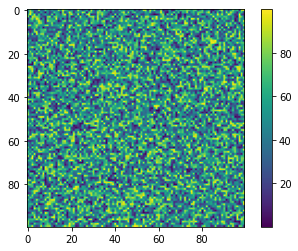

In [4]:
ivals = imfa.values
plt.imshow(ivals[0:100])
plt.colorbar();

In [5]:
print(imfa.how)
print(imfa.factor)

How.internal
1.0


In [6]:
imfa._flat

array([40.94, 83.57, 50.55, ...,  5.81, 30.69,  1.37])

adjust values

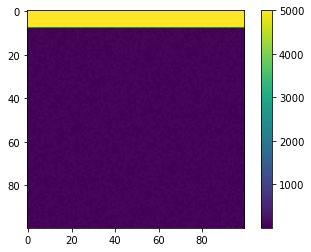

In [7]:
imfa[0:8] = 5000
ivals2 = imfa.values
plt.imshow(ivals2[0:100])
plt.colorbar();

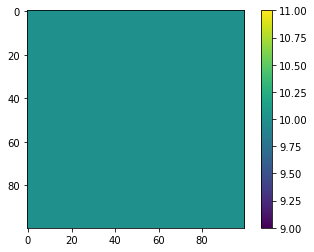

In [8]:
fhandle = open(constant)
cmfa = MFArray.load(fhandle, pth, shape)
cvals = cmfa.values
plt.imshow(cvals[0:100])
plt.colorbar();

In [9]:
print(cmfa._flat)

10.0


In [10]:
cmfa.how

<How.constant: 'CONSTANT'>

Slicing and multiplication

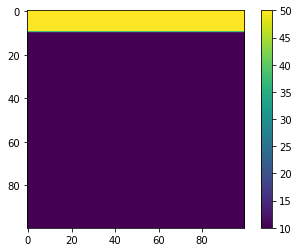

In [11]:
cmfa[0:10] *= 5
plt.imshow(cmfa[0:100])
plt.colorbar();

In [12]:
cmfa.how

<How.internal: 'INTERNAL'>

In [13]:
cvals2 = cmfa.values
cmfa._flat

array([50., 50., 50., ..., 10., 10., 10.])

External

In [14]:
fhandle = open(external)
emfa = MFArray.load(fhandle, pth, shape)
evals = emfa.values
evals

array([[90.82, 57.65, 94.33, ..., 85.47, 54.65, 42.72],
       [51.56, 88.93, 99.38, ..., 67.75, 18.49, 98.28],
       [51.33,  7.89, 70.34, ..., 80.98, 58.59, 37.59],
       ...,
       [28.2 , 48.39, 58.82, ..., 68.2 , 80.05, 82.75],
       [90.33, 65.93, 67.73, ..., 86.22, 20.4 , 53.08],
       [52.98, 67.  , 98.51, ..., 39.48, 62.58, 29.11]])

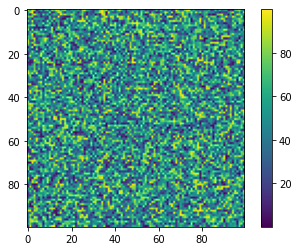

In [15]:
plt.imshow(emfa[0:100])
plt.colorbar();

In [16]:
emfa.how, emfa.factor

(<How.external: 'OPEN/CLOSE'>, 1.0)

In [17]:
emfa **= 6
evals2 = emfa.values
evals2

array([[5.61162945e+11, 3.67109708e+10, 7.04529215e+11, ...,
        3.89836253e+11, 2.66404157e+10, 6.07837464e+09],
       [1.87878659e+10, 4.94640593e+11, 9.63371856e+11, ...,
        9.67065293e+10, 3.99596308e+07, 9.01137135e+11],
       [1.82905846e+10, 2.41247054e+05, 1.21119532e+11, ...,
        2.82011381e+11, 4.04520922e+10, 2.82120051e+09],
       ...,
       [5.02915070e+08, 1.28390749e+10, 4.14142805e+10, ...,
        1.00625082e+11, 2.63128577e+11, 3.21076126e+11],
       [5.43240401e+11, 8.21293630e+10, 9.65353674e+10, ...,
        4.10816720e+11, 7.20743948e+07, 2.23658540e+10],
       [2.21142250e+10, 9.04583822e+10, 9.13864726e+11, ...,
        3.78671713e+09, 6.00638758e+10, 6.08489702e+08]])

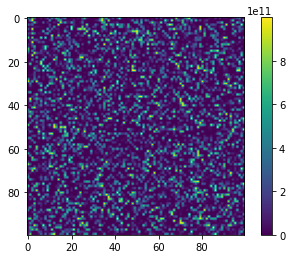

In [18]:
plt.imshow(emfa[0:100])
plt.colorbar();

#### Layered data
layered data

In [19]:
ilayered = pth / "internal_layered.txt"
clayered = pth / "constant_layered.txt"
mlayered = pth / "mixed_layered.txt"  # (internal, constant, external)

In [20]:
fhandle = open(ilayered)
shape = (3, 1000, 100)
ilmfa = MFArray.load(fhandle, pth, shape, layered=True)
vals = ilmfa.values

In [21]:
ilmfa._flat  # internal storage

array([<flopy4.data.mfarray.MFArray object at 0x000001BFBF6C1490>,
      dtype=object)

In [22]:
vals = ilmfa.values
vals

array([[[30.73, 17.56, 90.94, ..., 10.51, 96.21, 74.58],
        [85.56, 80.05, 96.06, ..., 75.12, 27.62, 71.45],
        [71.08, 94.16, 37.75, ...,  7.8 , 27.45, 33.68],
        ...,
        [68.63, 31.53, 94.7 , ..., 48.31,  2.69, 76.94],
        [77.05, 95.77, 33.57, ..., 55.91, 73.72, 80.73],
        [52.81, 42.31, 56.22, ..., 39.01,  8.42,  0.54]],

       [[21.76, 81.12, 24.75, ..., 97.9 , 65.95, 43.35],
        [26.79, 85.66, 37.  , ..., 52.06, 12.59, 26.82],
        [29.55, 27.92,  2.77, ..., 84.51, 85.58, 10.47],
        ...,
        [90.81,  9.37, 53.4 , ..., 25.74, 28.14, 96.95],
        [22.82, 14.32, 61.13, ..., 17.43, 88.37, 55.64],
        [ 1.95,  7.02,  8.48, ..., 95.37, 82.31, 98.67]],

       [[68.96, 37.04, 12.66, ..., 28.4 , 92.12, 65.96],
        [27.02, 45.72, 39.24, ..., 37.5 , 37.68, 23.81],
        [91.83, 73.  , 99.3 , ..., 47.65, 29.26, 91.01],
        ...,
        [73.29, 44.95, 40.34, ...,  9.69, 98.21, 83.53],
        [61.94, 20.3 , 39.96, ...,  1.99,  0.

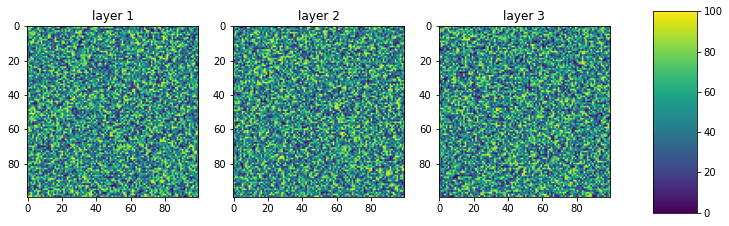

In [23]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))
vmin, vmax = np.min(vals), np.max(vals)
for ix, v in enumerate(vals):
    im = axs[ix].imshow(v[0:100], vmin=vmin, vmax=vmax)
    axs[ix].set_title(f"layer {ix + 1}")
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax);

In [24]:
ilmfa.how

[<How.internal: 'INTERNAL'>,
 <How.internal: 'INTERNAL'>,
 <How.internal: 'INTERNAL'>]

In [25]:
ilmfa.factor

[1.0, 1.0, 1.0]

Adjust array values using ufuncs

In [26]:
ilmfa[0, 0:10, 0:60] += 350
ilmfa[1, 10:20, 20:80] += 350  
ilmfa[2, 20:30, 40:] += 350

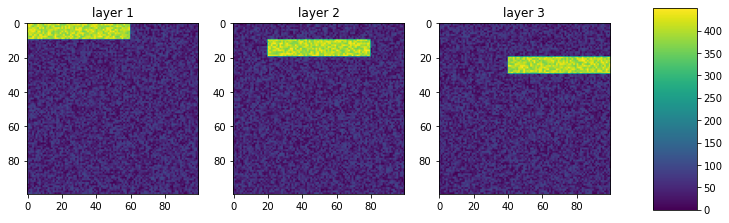

In [27]:
vals = ilmfa.values
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))
vmin, vmax = np.min(vals), np.max(vals)
for ix, v in enumerate(vals):
    im = axs[ix].imshow(v[0:100], vmin=vmin, vmax=vmax)
    axs[ix].set_title(f"layer {ix + 1}")
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax);

Layered constants

In [28]:
fhandle = open(clayered)
shape = (3, 1000, 100)
clmfa = MFArray.load(fhandle, pth, shape, layered=True)

In [29]:
clmfa._flat

array([<flopy4.data.mfarray.MFArray object at 0x000001BFBF6A09A0>,
      dtype=object)

In [30]:
for obj in clmfa._flat:
    print(obj._flat)
clmfa.how

10.0
9.0
8.0


[<How.constant: 'CONSTANT'>,
 <How.constant: 'CONSTANT'>,
 <How.constant: 'CONSTANT'>]

In [31]:
vals = clmfa.values

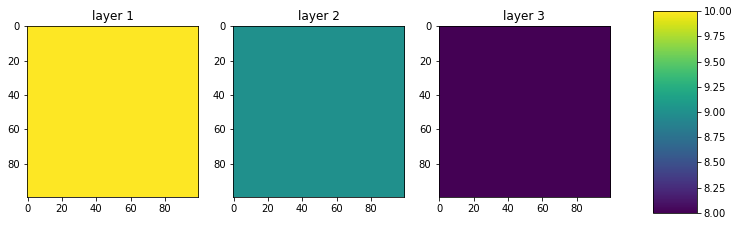

In [32]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))
vmin, vmax = np.min(vals), np.max(vals)
for ix, v in enumerate(vals):
    im = axs[ix].imshow(v[0:100], vmin=vmin, vmax=vmax)
    axs[ix].set_title(f"layer {ix + 1}")
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax);

Adjust a slice of the layered array

In [33]:
clmfa[0, 0:80, 20:80] += 10
clmfa[1] += 5
clmfa[2] += 2

In [34]:
clmfa.how

[<How.internal: 'INTERNAL'>,
 <How.constant: 'CONSTANT'>,
 <How.constant: 'CONSTANT'>]

In [35]:
# verify that the constants haven't 
# been converted to array internally
for obj in clmfa._flat[1:]:
    print(obj._flat)

14.0
10.0


In [36]:
vals = clmfa.values

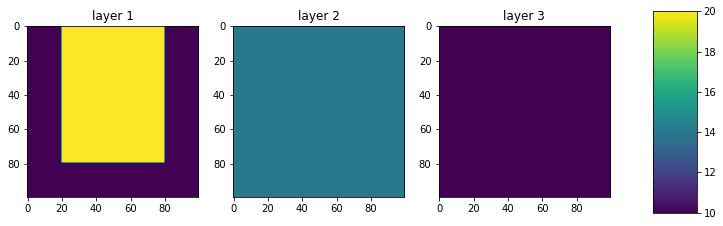

In [37]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))
vmin, vmax = np.min(vals), np.max(vals)
for ix, v in enumerate(vals):
    im = axs[ix].imshow(v[0:100], vmin=vmin, vmax=vmax)
    axs[ix].set_title(f"layer {ix + 1}")
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax);

Mixed data source Layered

In [87]:
fhandle = open(mlayered)
shape = (3, 1000, 100)
mlmfa = MFArray.load(fhandle, pth, shape, layered=True)

In [72]:
mlmfa.how

[<How.constant: 'CONSTANT'>,
 <How.external: 'OPEN/CLOSE'>,
 <How.internal: 'INTERNAL'>]

In [88]:
mlmfa._flat

array([<flopy4.data.mfarray.MFArray object at 0x000001BFC3CCEEE0>,
      dtype=object)

In [90]:
vals = mlmfa.values
vals = np.where(vals <= 0, vals.mean(), vals)
mlmfa[:] = vals

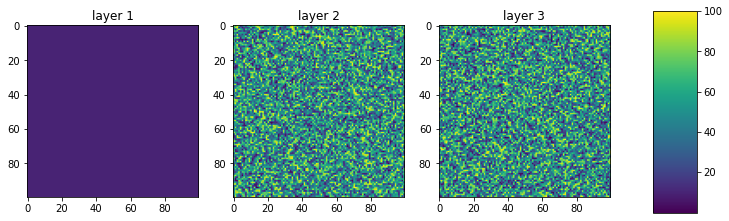

In [91]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))
vmin, vmax = np.min(vals), np.max(vals)
for ix, v in enumerate(vals):
    im = axs[ix].imshow(v[0:100], vmin=vmin, vmax=vmax)
    axs[ix].set_title(f"layer {ix + 1}")
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax);

### Using numpy mathematical functions with MFArray

Numpy support has been added to MFArray though the __array_ufunc__ mixin method. This method allows us to send MFArray to numpy standard functions like `np.log()`, `np.sin()`, `np.pow()`, etc ...

In [92]:
mlmfa = np.log(mlmfa)
mlmfa

In [93]:
vals = mlmfa.values
vals

array([[[2.30258509, 2.30258509, 2.30258509, ..., 2.30258509,
         2.30258509, 2.30258509],
        [2.30258509, 2.30258509, 2.30258509, ..., 2.30258509,
         2.30258509, 2.30258509],
        [2.30258509, 2.30258509, 2.30258509, ..., 2.30258509,
         2.30258509, 2.30258509],
        ...,
        [2.30258509, 2.30258509, 2.30258509, ..., 2.30258509,
         2.30258509, 2.30258509],
        [2.30258509, 2.30258509, 2.30258509, ..., 2.30258509,
         2.30258509, 2.30258509],
        [2.30258509, 2.30258509, 2.30258509, ..., 2.30258509,
         2.30258509, 2.30258509]],

       [[4.50887953, 4.05439025, 4.54679927, ..., 4.44816544,
         4.00094921, 3.75466719],
        [3.94274618, 4.48784954, 4.59895089, ..., 4.21582446,
         2.91723005, 4.58782055],
        [3.93827538, 2.06559613, 4.25334063, ..., 4.39420221,
         4.07056403, 3.62673806],
        ...,
        [3.33932198, 3.87929318, 4.07448193, ..., 4.22244456,
         4.38265144, 4.41582401],
        [4.5

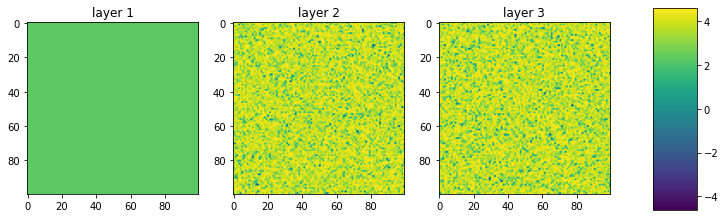

In [94]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))
vmin, vmax = np.min(vals), np.max(vals)
for ix, v in enumerate(vals):
    im = axs[ix].imshow(v[0:100], vmin=vmin, vmax=vmax)
    axs[ix].set_title(f"layer {ix + 1}")
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax);

We can also get statistical information about the data, like `sum()`, `mean()`, `max()`, `min()`, `median`, `std()`

In [96]:
mlmfa.sum()

11001832.049999999

In [97]:
mlmfa.min(), mlmfa.mean(), mlmfa.max()

(0.0, 36.6727735, 100.0)